# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Fire Alarm Triggering Analysis</p>



<p style="text-align:justify; ">
A <B>Fire Alarm System</B> warns people when smoke, fire, carbon monoxide or other fire-related or general notification emergencies are detected. These alarms may be activated automatically from smoke detectors and heat detectors or may also be activated via manual fire alarm activation devices such as manual call points or pull stations. Alarms can be either motorized bells or wall mountable sounders or horns. They can also be speaker strobes which sound an alarm, followed by a voice evacuation message which warns people inside the building not to use the elevators. Fire alarm sounders can be set to certain frequencies and different tones including low, medium and high, depending on the country and manufacturer of the device. Most fire alarm systems in Europe sound like a siren with alternating frequencies. Fire alarm electronic devices are known as horns in the United States and Canada and can be either continuous or set to different codes. Fire alarm warning devices can also be set to different volume levels.  
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |No  | Contents  |
|:---| :---     |:---| :----     |:---| :----     |
|1   | [<font color="#5f0d11"> Importing Libraries</font>](#1)             |7   | [<font color="#5f0d11"> Temperature</font>](#7)                |13   | [<font color="#5f0d11"> Air Pressure</font>](#13) |
|2   | [<font color="#5f0d11"> About Dataset</font>](#2)                   |8   | [<font color="#5f0d11"> Humidity</font>](#8)        |14   | [<font color="#5f0d11"> Particulate Matter</font>](#14) |
|3   | [<font color="#5f0d11"> Basic Exploration</font>](#3)               |9  | [<font color="#5f0d11"> Total Volatile Organic Compounds</font>](#9)       |15   | [<font color="#5f0d11"> Concentration Of Particulate Matter</font>](#15)  |     
|4   | [<font color="#5f0d11"> Dataset Summary</font>](#4)                 |10  | [<font color="#5f0d11"> CO2 Equivalent Concentration</font>](#10)                  |16   | [<font color="#5f0d11"> Correlation Map</font>](#16)  |                
|5   | [<font color="#5f0d11"> Data Preprocessing</font>](#5)               |11  | [<font color="#5f0d11"> Raw Hydrogen Existance</font>](#11)        |17   | [<font color="#5f0d11"> Model Creation & Performance Evaluation</font>](#17)  |
|6   | [<font color="#5f0d11"> Custom Palette For Visualization</font>](#6) |12  | [<font color="#5f0d11"> Raw Ethanol Existance</font>](#12)  |18   | [<font color="#5f0d11"> Thank You</font>](#18)  |         


<a id="1"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install -q ptitprince
import ptitprince as pt 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **UTC:** Time when experiment was performed
* **Temperature[C]:** Temperature of surroundings, measured in celcius
* **Humidity[%]:** Air humidity during the experiment
* **TVOC[ppb]:** Total Volatile Organic Compounds, measured in ppb (parts per billion)
* **eCO2[ppm]:** CO2 equivalent concentration, measured in ppm (parts per million)
* **Raw H2:** The amount of Raw Hydrogen [Raw Molecular Hydrogen; not compensated (Bias, Temperature etc.)] present in surroundings
* **Raw Ethanol:** The amount of Raw Ethanol present in surroundings
* **Pressure[hPa]:** Air pressure, Measured in hPa
* **PM1.0:** Paticulate matter of diameter less than 1.0 micrometer 
* **PM2.5:** Paticulate matter of diameter less than 2.5 micrometer
* **NC0.5:** Concentration of particulate matter of diameter less than 0.5 micrometer
* **NC1.0:** Concentration of particulate matter of diameter less than 1.0 micrometer
* **NC2.5:** Concentration of particulate matter of diameter less than 2.5 micrometer
* **CNT:** Sample Count. Fire Alarm(Reality) If fire was present then value is 1 else it is 0 
* **Fire Alarm:** **1** means **Positive** and **0** means **Not Positive**


In [5]:
data = pd.read_csv("../input/smoke-detection-dataset/smoke_detection_iot.csv",index_col=0)

<a id="3"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [6]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

Shape Of The Dataset : (62630, 15)

Glimpse Of The Dataset :


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000000,57.360000,0,400,12306,18520,939.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,1654733332,20.015000,56.670000,0,400,12345,18651,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
2,1654733333,20.029000,55.960000,0,400,12374,18764,939.738000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0
3,1654733334,20.044000,55.280000,0,400,12390,18849,939.736000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0
4,1654733335,20.059000,54.690000,0,400,12403,18921,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0


In [7]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [8]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

Summary Of The Dataset :


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1654792066.184273,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,110002.488078,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1654712187.000000,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1654743244.250000,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1654761919.500000,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1654777576.750000,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1655130051.000000,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [9]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 62630 entries in this dataset.
After removing duplicate entries there are 62630 entries in this dataset.


In [10]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

Null values of the Dataset :


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Insights:**

* There is no missing values in this dataset.
* There is no duplicate values in this dataset.


<a id="5"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [11]:
data["Fire Alarm"].replace({0:"No", 1:"Yes"}, inplace = True)
data.rename(columns={"Temperature[C]": "Temperature","Humidity[%]": "Humidity","TVOC[ppb]":"TVOC","eCO2[ppm]":"eCO2","Pressure[hPa]":"Pressure"}, inplace = True)
data = data[["Temperature","Humidity","TVOC","eCO2","Raw H2","Raw Ethanol","Pressure","PM1.0","PM2.5","NC0.5","NC1.0","NC2.5","Fire Alarm"]]

print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

After preprocessing, let's have a glimpse of the final dataset :


,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000000,57.360000,0,400,12306,18520,939.735000,0.000000,0.000000,0.000000,0.000000,0.000000,No
1,20.015000,56.670000,0,400,12345,18651,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,No
2,20.029000,55.960000,0,400,12374,18764,939.738000,0.000000,0.000000,0.000000,0.000000,0.000000,No
3,20.044000,55.280000,0,400,12390,18849,939.736000,0.000000,0.000000,0.000000,0.000000,0.000000,No
4,20.059000,54.690000,0,400,12403,18921,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,No


In [12]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().T.style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

After preprocessing, let's have a look on the summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
Temperature,62630.000000,15.970424,14.359576,-22.010000,10.994250,20.130000,25.409500,59.930000
Humidity,62630.000000,48.539499,8.865367,10.740000,47.530000,50.150000,53.240000,75.200000
TVOC,62630.000000,1942.057528,7811.589055,0.000000,130.000000,981.000000,1189.000000,60000.000000
eCO2,62630.000000,670.021044,1905.885439,400.000000,400.000000,400.000000,438.000000,60000.000000
Raw H2,62630.000000,12942.453936,272.464305,10668.000000,12830.000000,12924.000000,13109.000000,13803.000000
Raw Ethanol,62630.000000,19754.257912,609.513156,15317.000000,19435.000000,19501.000000,20078.000000,21410.000000
Pressure,62630.000000,938.627649,1.331344,930.852000,938.700000,938.816000,939.418000,939.861000
PM1.0,62630.000000,100.594309,922.524245,0.000000,1.280000,1.810000,2.090000,14333.690000
PM2.5,62630.000000,184.467770,1976.305615,0.000000,1.340000,1.880000,2.180000,45432.260000
NC0.5,62630.000000,491.463608,4265.661251,0.000000,8.820000,12.450000,14.420000,61482.030000


<a id="6"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [13]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#e9bb93", "figure.facecolor":"#e9bb93",
            "axes.grid":True, "grid.color":"white", "axes.edgecolor":"black",
            "grid.linestyle": u"-", "axes.labelcolor": "black", "font.family": [u"DejaVu Sans"],
            "text.color": "black", "xtick.color": "black", "ytick.color": "black",
            "legend.facecolor":"#e9bb93", "legend.frameon": True, "legend.edgecolor":"black"})
sns.set_context("poster",font_scale = .7)

palette = ["#272716","#6c2411","#ae0d13","#cc3f18","#db6400"]
palette_cmap = ["#272716","#6c2411","#cc3f18","#db6400","#ae0d13"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

<a id="7"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Temperature</p>

Let's have a look on the distribution of temperature :


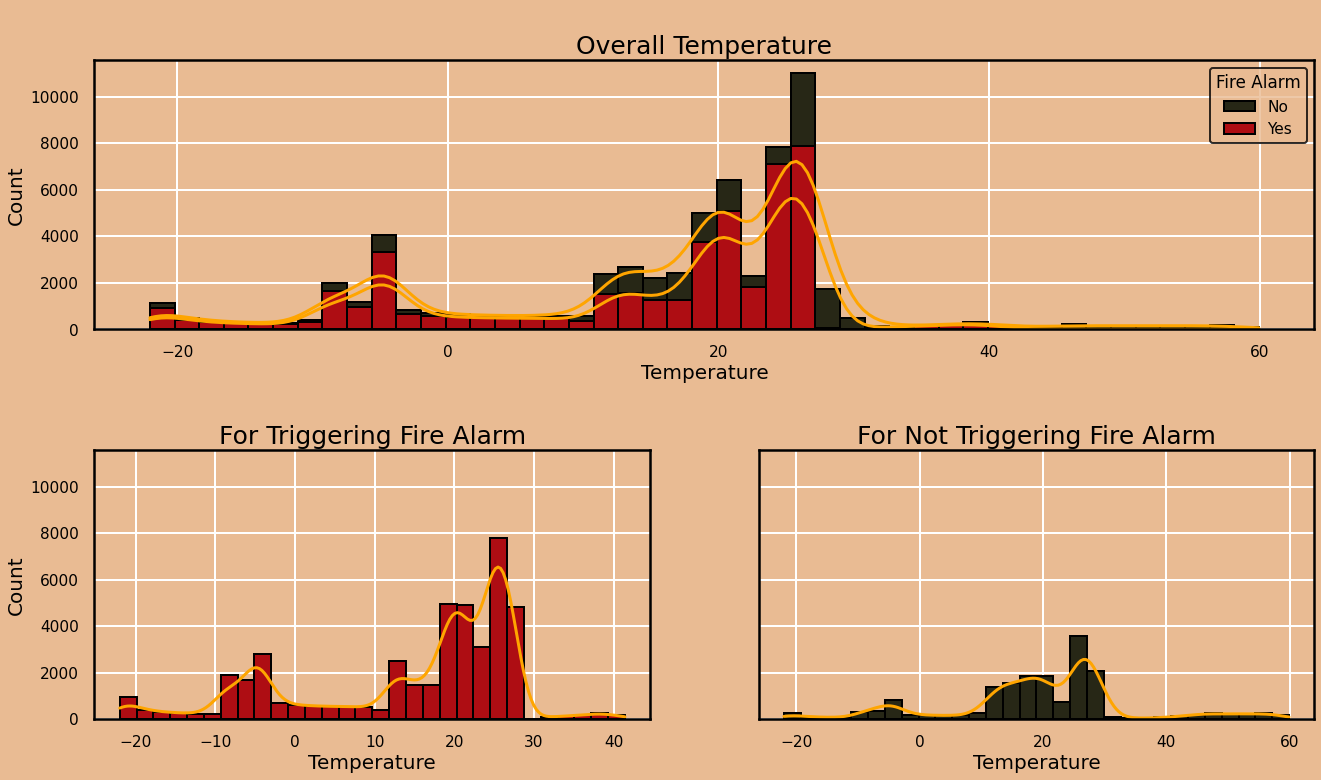

In [14]:
print(f"Let's have a look on the distribution of temperature :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Temperature",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].lines[0].set_color("orange")
axs["00"].lines[1].set_color("orange")
axs["00"].set_title("\nOverall Temperature",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Temperature",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Temperature",ax=axs["10"],color=palette[2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].lines[0].set_color("orange")
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Temperature",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Temperature",ax=axs["11"],color=palette[0],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].lines[0].set_color("orange")
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Temperature",fontsize=20)
axs["11"].set_yscale("linear")

plt.show()

Let's have a look on the distribution of effectiveness-wise temperature analysis :


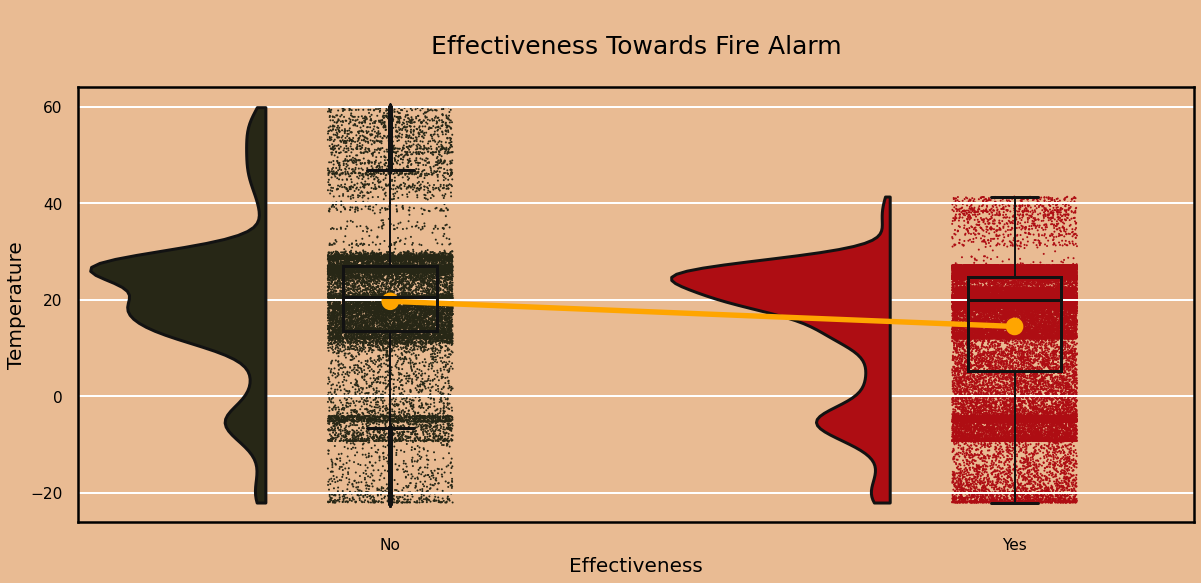

In [15]:
print("Let's have a look on the distribution of effectiveness-wise temperature analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Temperature"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Temperature",fontsize=20)

plt.show()

**Insights:**

* We can see the temperature distribution is left skewed. Most of the temperatures fall in between **12°C** to **28°C**.
* Most of the temperatures cause fire alarming fall in between **18°C** to **28°C**.
* Most of the temperatures do not cause fire alarming fall in between **12°C** to **28°C**.
* Average temperature that does not cause fire alarming is **19.69°C**.
* Average temperature that causes fire alarming is **14.48°C**.

<a id="8"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Humidity</p>

Let's have a look on the distribution of humidity :


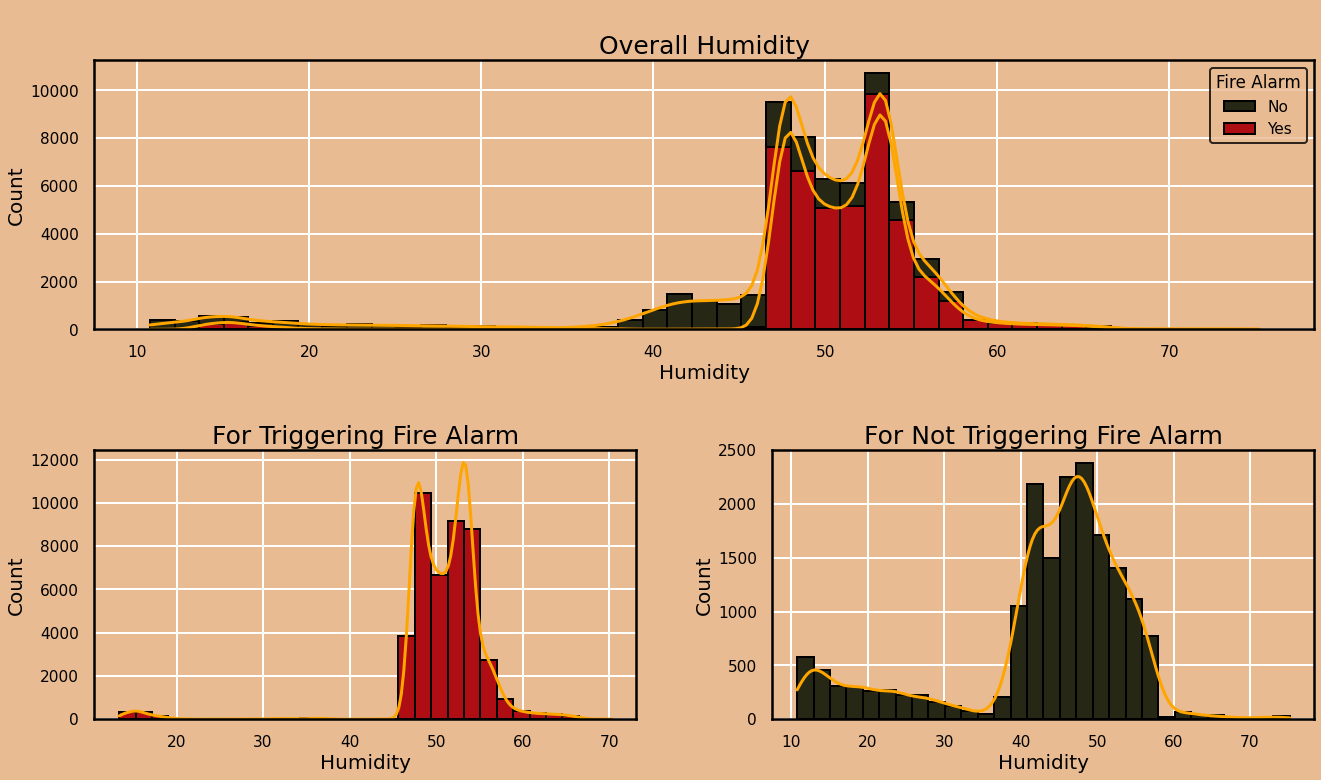

In [16]:
print(f"Let's have a look on the distribution of humidity :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Humidity",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].lines[0].set_color("orange")
axs["00"].lines[1].set_color("orange")
axs["00"].set_title("\nOverall Humidity",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Humidity",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Humidity",ax=axs["10"],color=palette[2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].lines[0].set_color("orange")
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Humidity",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Humidity",ax=axs["11"],color=palette[0],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].lines[0].set_color("orange")
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Humidity",fontsize=20)
axs["11"].set_yscale("linear")

plt.show()

Let's have a look on the distribution of effectiveness-wise humidity analysis :


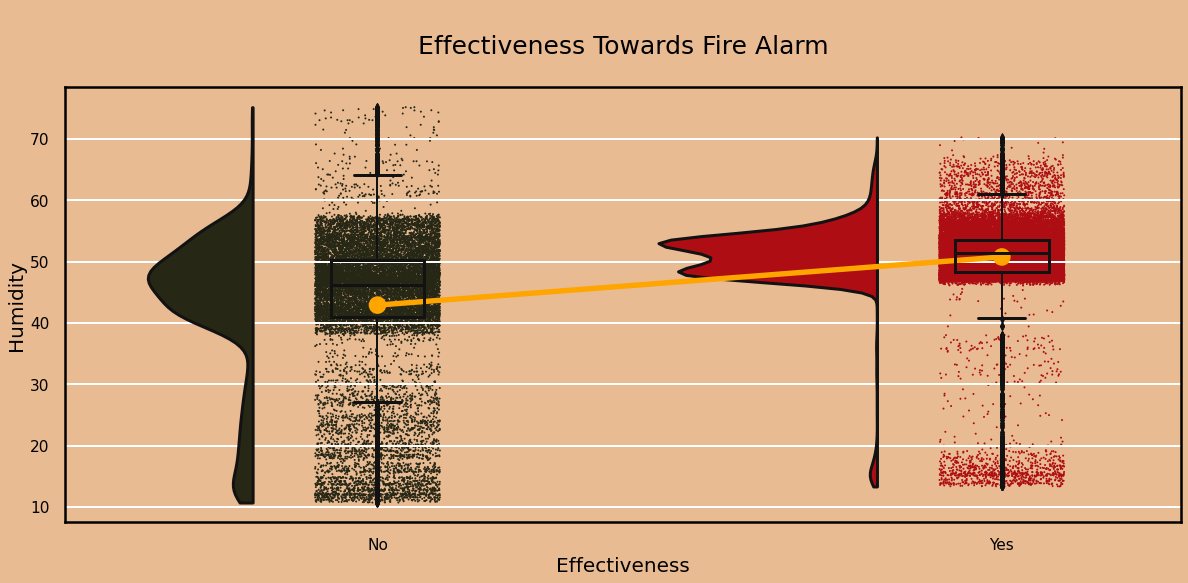

In [17]:
print("Let's have a look on the distribution of effectiveness-wise humidity analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Humidity"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Humidity",fontsize=20)

plt.show()

**Insights:**

* We can see the humidity distribution is left skewed. Most of the humidities fall in between **46%** to **57%**.
* Most of the humidities cause fire alarming fall in between **46%** to **56%**.
* Most of the humidities do not cause fire alarming fall in between **40%** to **54%**.
* Average humidity that does not cause fire alarming is **42.93%**.
* Average humidity that causes fire alarming is **50.78%**.

<a id="9"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Total Volatile Organic Compounds</p>

Let's have a look on the distribution of total volatile organic compounds :


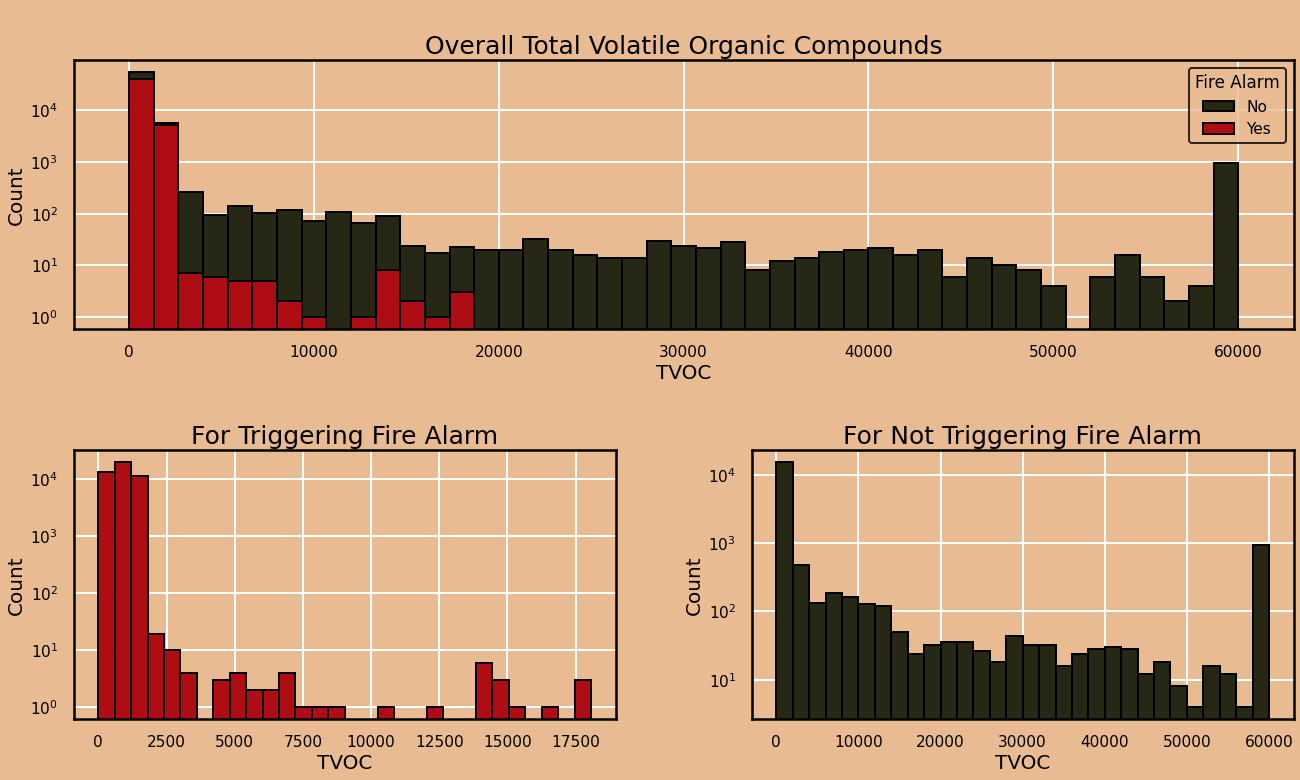

In [18]:
print(f"Let's have a look on the distribution of total volatile organic compounds :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="TVOC",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Total Volatile Organic Compounds",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("TVOC",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="TVOC",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("TVOC",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="TVOC",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("TVOC",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise total volatile organic compounds analysis :


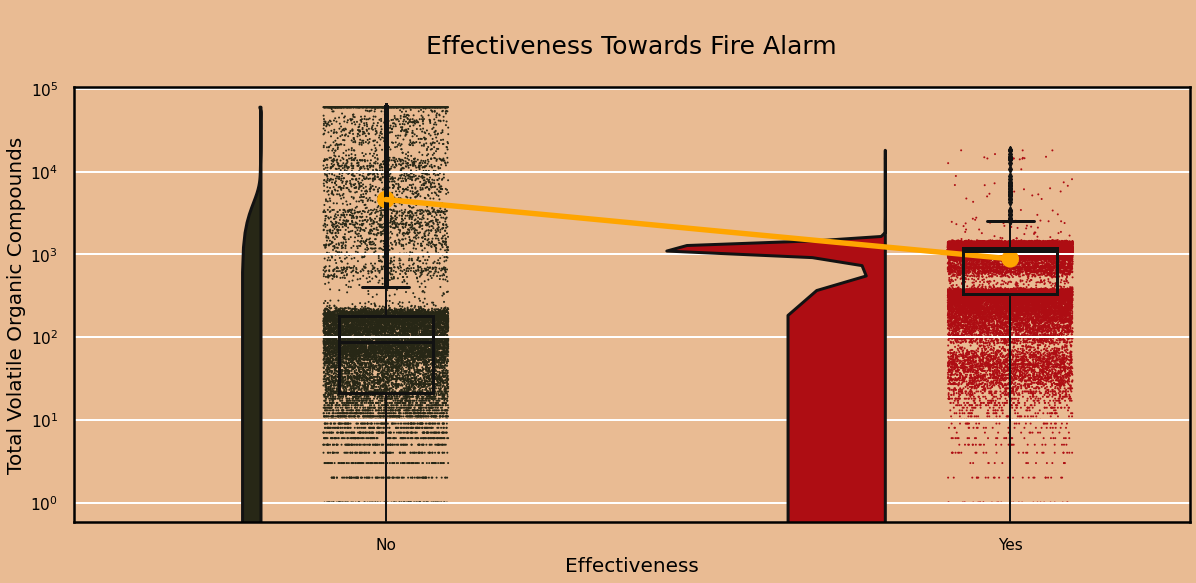

In [19]:
print("Let's have a look on the distribution of effectiveness-wise total volatile organic compounds analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["TVOC"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Total Volatile Organic Compounds",fontsize=20)
p.axes.set_yscale("log")

plt.show()

**Insights:**

* We can see the total volatile organic compounds distribution is right skewed. Most of the values fall in between **80ppb** to **2000ppb**.
* Most of the total volatile organic compounds values cause fire alarming fall in between **200ppb** to **2000ppb**.
* Most of the total volatile organic compounds values do not cause fire alarming fall in between **80ppb** to **300ppb**.
* Average total volatile organic compounds value that does not cause fire alarming is **4596.587ppb**.
* Average total volatile organic compounds value that causes fire alarming is **882ppb**.

<a id="10"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">CO2 Equivalent Concentration</p>

Let's have a look on the distribution of CO2 equivalent concentration :


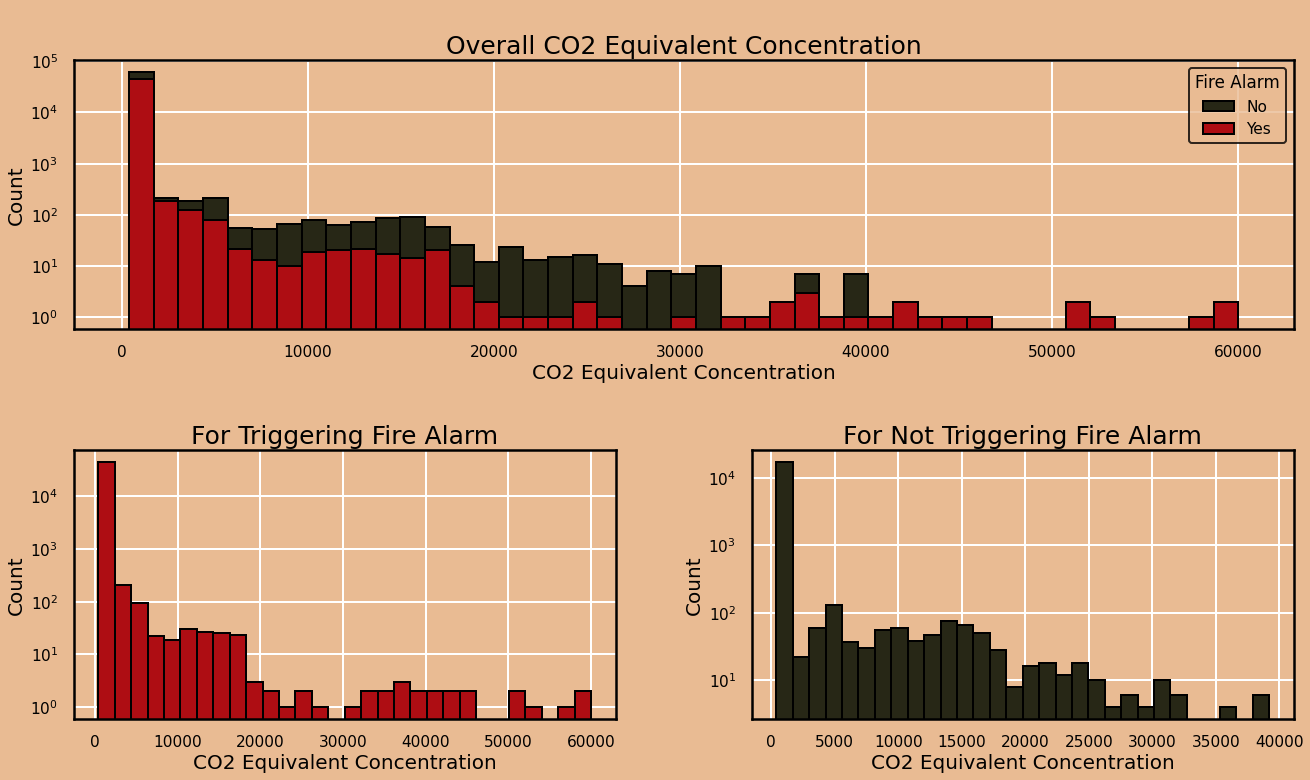

In [20]:
print(f"Let's have a look on the distribution of CO2 equivalent concentration :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="eCO2",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall CO2 Equivalent Concentration",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="eCO2",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="eCO2",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise CO2 equivalent concentration analysis :


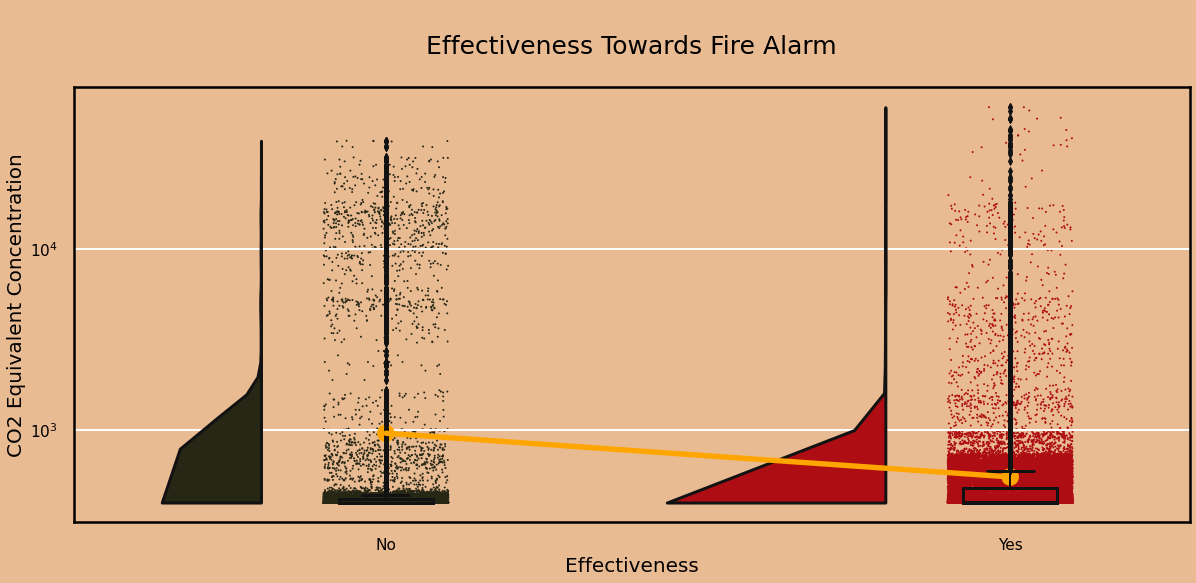

In [21]:
print("Let's have a look on the distribution of effectiveness-wise CO2 equivalent concentration analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["eCO2"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("CO2 Equivalent Concentration",fontsize=20)
p.axes.set_yscale("log")

plt.show()

**Insights:**

* We can see the CO2 equivalent concentration distribution is right skewed. Most of the values fall in between **400ppm** to **450ppm**.
* Most of the CO2 equivalent concentration values cause fire alarming fall in between **400ppm** to **438ppm**.
* Most of the CO2 equivalent concentration values do not cause fire alarming fall in between **400ppm** to **440ppm**.
* Average CO2 equivalent concentration value that does not cause fire alarming is **962.58ppm**.
* Average CO2 equivalent concentration value that causes fire alarming is **553.19ppm**.

<a id="11"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Raw Hydrogen Existance</p>

Let's have a look on the distribution of raw hydrogen :


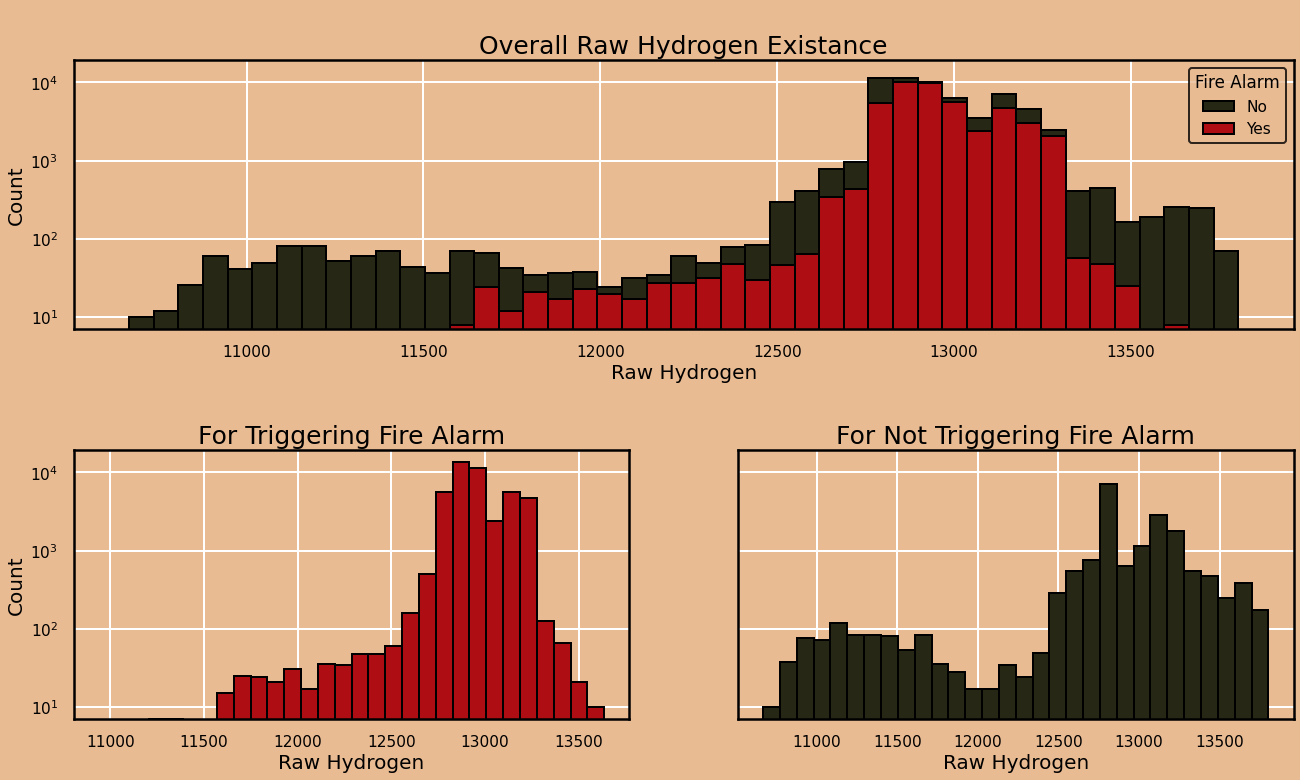

In [22]:
print(f"Let's have a look on the distribution of raw hydrogen :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Raw H2",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Raw Hydrogen Existance",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Raw H2",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Raw H2",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise raw hydrogen existance analysis :


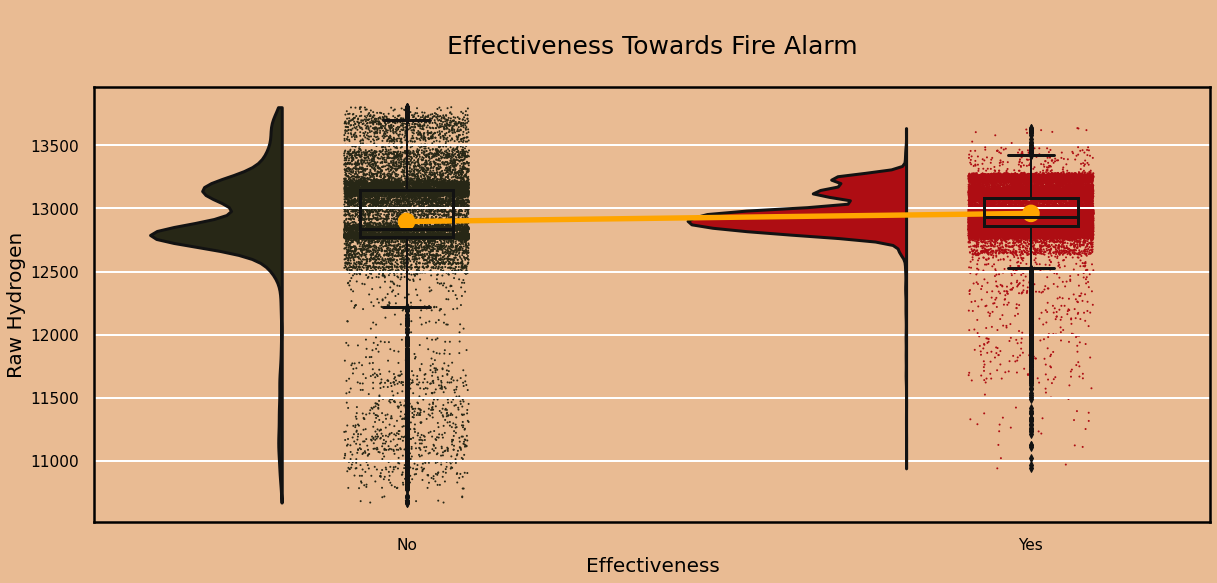

In [23]:
print("Let's have a look on the distribution of effectiveness-wise raw hydrogen existance analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Raw H2"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Raw Hydrogen",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

**Insights:**

* We can see the raw hydrogen existance values distribution is left skewed. Most of the values fall in between **12500ppm** to **13400ppm**.
* Most of the raw hydrogen existance values cause fire alarming fall in between **12750ppm** to **13300ppm**.
* Most of the raw hydrogen existance values do not cause fire alarming fall in between **12500ppm** to **13700ppm**.
* Average raw hydrogen existance value that does not cause fire alarming is **12896.31ppm**.
* Average raw hydrogen existance value that causes fire alarming is **12960.87ppm**.

<a id="12"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Raw Ethanol Existance</p>

Let's have a look on the distribution of raw ethanol :


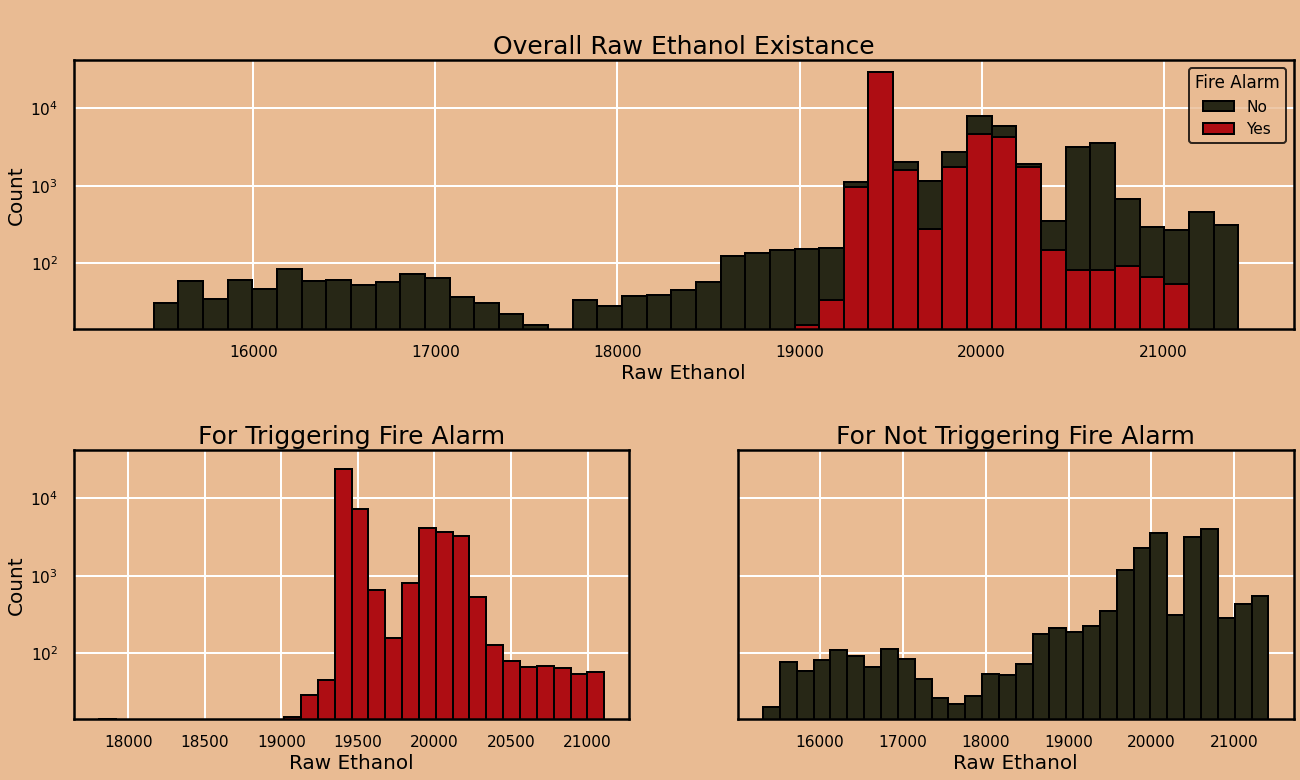

In [24]:
print(f"Let's have a look on the distribution of raw ethanol :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Raw Ethanol",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Raw Ethanol Existance",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Raw Ethanol",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Raw Ethanol",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Raw Ethanol",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Raw Ethanol",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Raw Ethanol",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise raw ethanol existance analysis :


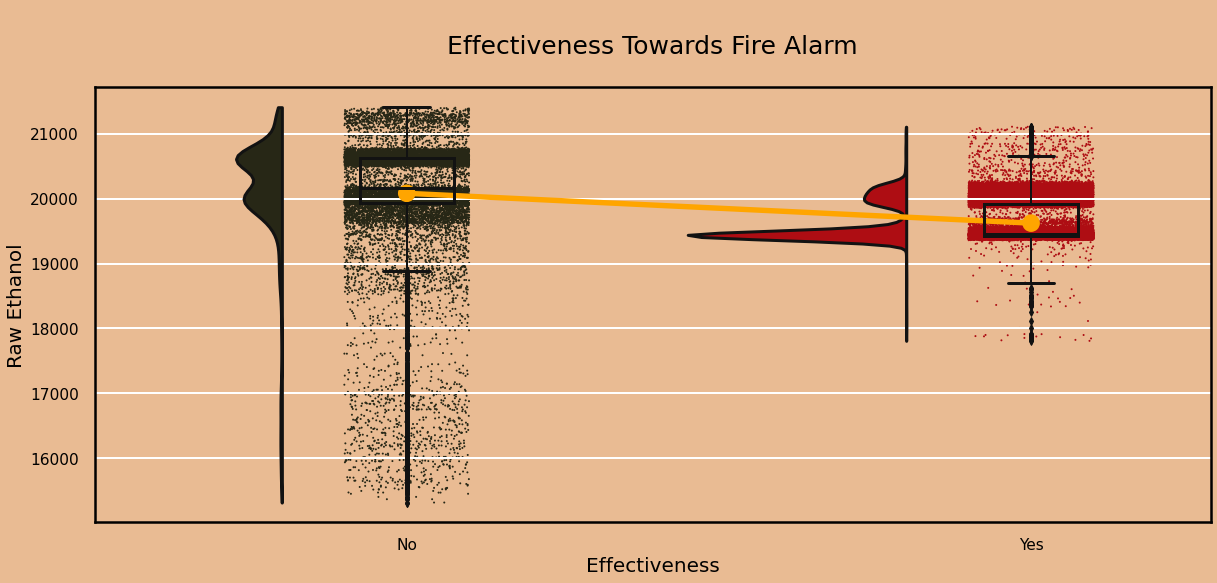

In [25]:
print("Let's have a look on the distribution of effectiveness-wise raw ethanol existance analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Raw Ethanol"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Raw Ethanol",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

**Insights:**

* We can see the raw ethanol existance values distribution is left skewed. Most of the values fall in between **19250ppm** to **20900ppm**.
* Most of the raw ethanol existance values cause fire alarming fall in between **19250ppm** to **20300ppm**.
* Most of the raw ethanol existance values do not cause fire alarming fall in between **19600ppm** to **21100ppm**.
* Average raw ethanol existance value that does not cause fire alarming is **20082.82ppm**.
* Average raw ethanol existance value that causes fire alarming is **19623.05ppm**.

<a id="13"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Air Pressure</p>

Let's have a look on the distribution of air pressure :


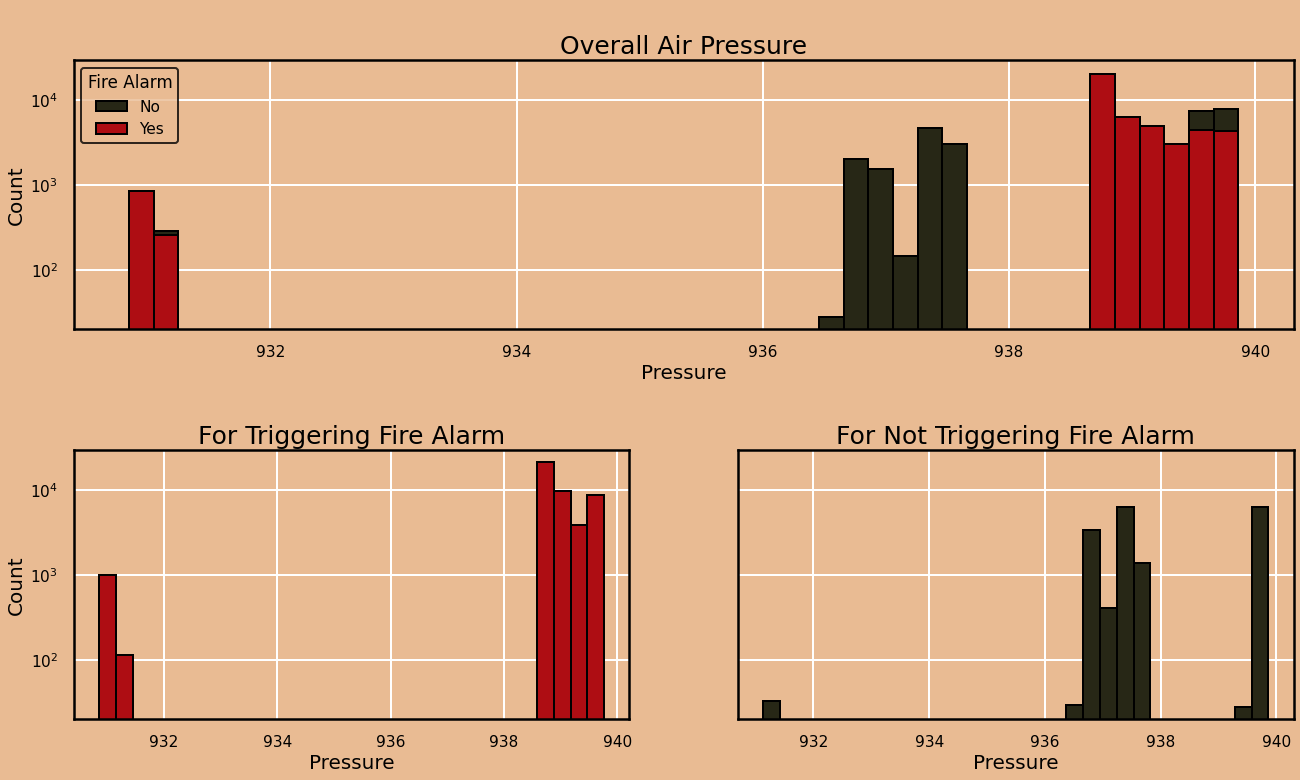

In [26]:
print(f"Let's have a look on the distribution of air pressure :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Pressure",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Air Pressure",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Pressure",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Pressure",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Pressure",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Pressure",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Pressure",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise air pressure :


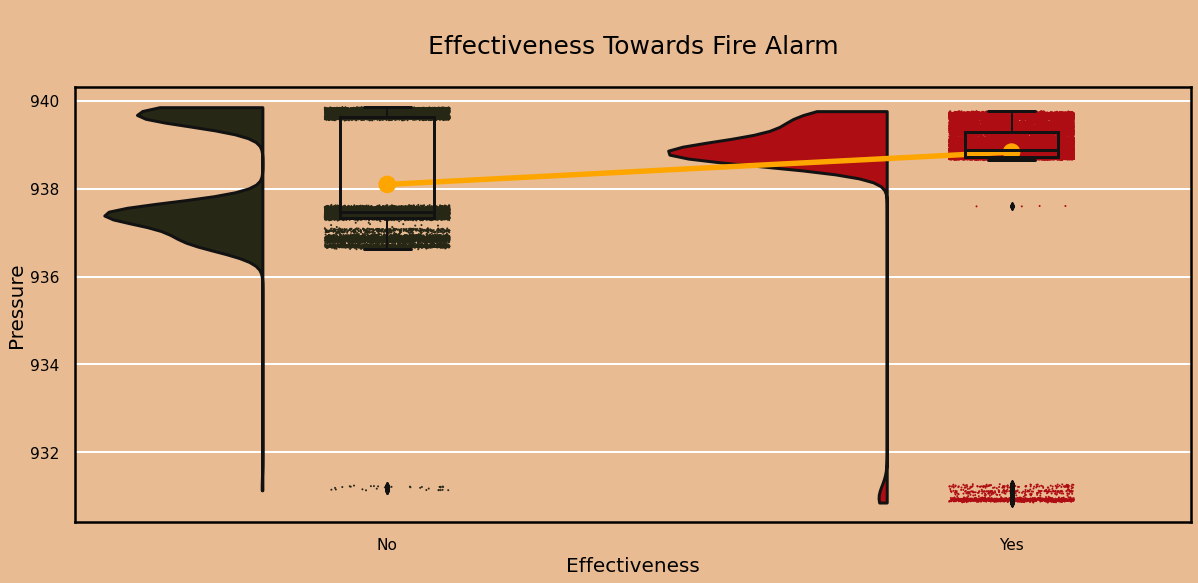

In [27]:
print("Let's have a look on the distribution of effectiveness-wise air pressure :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Pressure"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Pressure",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

**Insights:**

* We can see most of the air pressure values fall in between either **936.6hPa** to **937.7hPa** or **938.7hPa** to **939.9hPa**.
* Most of the air pressure values cause fire alarming fall in between **938.7hPa** to **939.9hPa**.
* Most of the air pressure values do not cause fire alarming fall in between **936.6hPa** to **937.7hPa**.
* Average air pressure value that does not cause fire alarming is **938.1hPa**.
* Average air pressure value that causes fire alarming is **938.8hPa**.

<a id="14"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Particulate Matter</p>

Let's have a look on the distribution of particulate matter values :


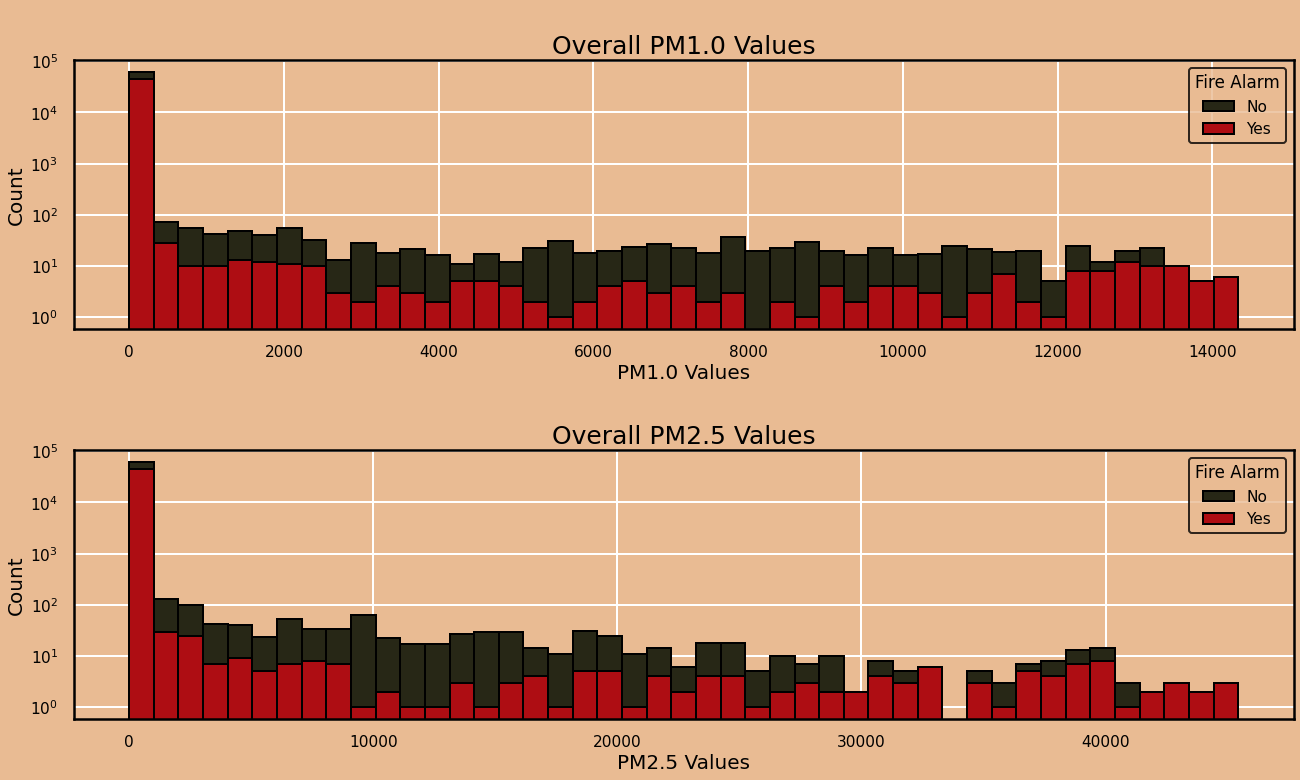

In [28]:
print(f"Let's have a look on the distribution of particulate matter values :")
_, axs = plt.subplots(2,1,figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="PM1.0",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[0],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[0].set_title("\nOverall PM1.0 Values",fontsize=25)
axs[0].set_ylabel("Count",fontsize=20)
axs[0].set_xlabel("PM1.0 Values",fontsize=20)
axs[0].set_yscale("linear")

sns.histplot(data=data,x="PM2.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[1],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[1].set_title("\nOverall PM2.5 Values",fontsize=25)
axs[1].set_ylabel("Count",fontsize=20)
axs[1].set_xlabel("PM2.5 Values",fontsize=20)
axs[1].set_yscale("log")

plt.show()

**Insights:**

* We can see most of the particulate matter 1.0 values fall in between either **1.66ppm** to **2.19ppm**, for particulate matter 2.5 it is **1.72ppm** to **2.26ppm**.
* Most of the particulate matter 1.0 values cause fire alarming fall in between **1.71ppm** to **2.08ppm**, for particulate matter 2.5 it is **1.78ppm** to **2.16ppm**.
* Most of the particulate matter 1.0 values do not cause fire alarming fall in between **0ppm** to **2.11ppm**, for particulate matter 2.5 it is **0ppm** to **2.12ppm**.
* Average particulate matter 1.0 value that does not cause fire alarming is **261.98ppm**, for particulate matter 2.5 it is **450.03ppm**.
* Average particulate matter 1.0 value that causes fire alarming is **36.14ppm**, for particulate matter 2.5 it is **78.4ppm**.

<a id="15"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Concentration Of Particulate Matter</p>

Let's have a look on the distribution of the concentration of particulate matter values :


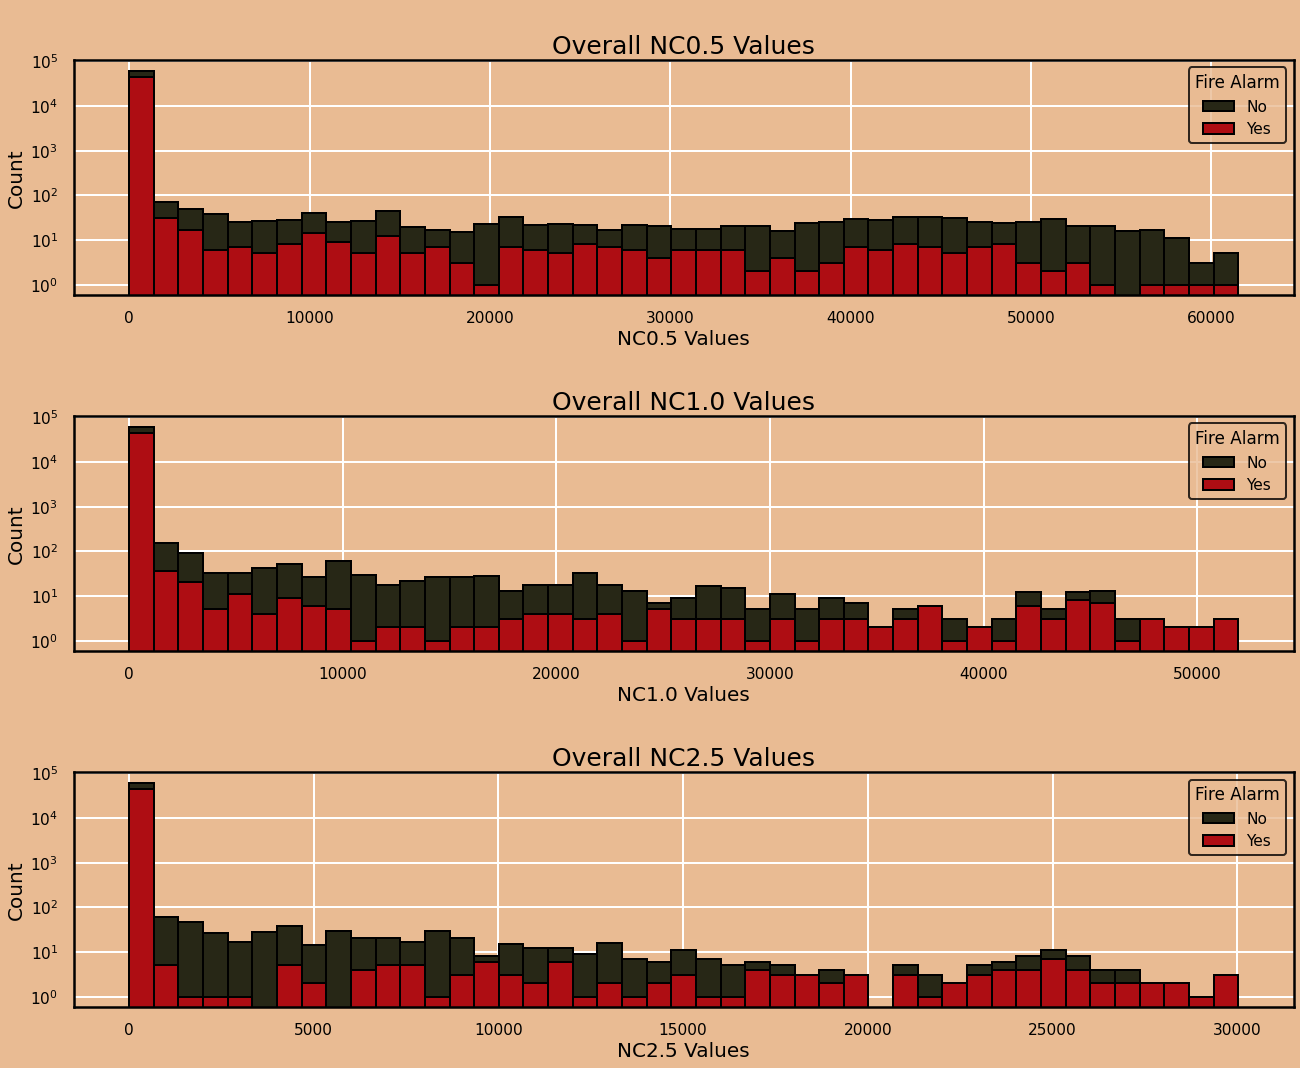

In [29]:
print(f"Let's have a look on the distribution of the concentration of particulate matter values :")
_, axs = plt.subplots(3,1,figsize=(20,16), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="NC0.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[0],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[0].set_title("\nOverall NC0.5 Values",fontsize=25)
axs[0].set_ylabel("Count",fontsize=20)
axs[0].set_xlabel("NC0.5 Values",fontsize=20)
axs[0].set_yscale("linear")

sns.histplot(data=data,x="NC1.0",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[1],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[1].set_title("\nOverall NC1.0 Values",fontsize=25)
axs[1].set_ylabel("Count",fontsize=20)
axs[1].set_xlabel("NC1.0 Values",fontsize=20)
axs[1].set_yscale("log")

sns.histplot(data=data,x="NC2.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[2],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[2].set_title("\nOverall NC2.5 Values",fontsize=25)
axs[2].set_ylabel("Count",fontsize=20)
axs[2].set_xlabel("NC2.5 Values",fontsize=20)
axs[2].set_yscale("log")

plt.show()

**Insights:**

* We can see most of the concentration of particulate matter 0.5 values fall in between either **0ppm** to **14.32ppm**, for particulate matter 1.0 it is **0ppm** to **2.2ppm** and for particulate matter 2.5 it is **0.006ppm** to **0.062ppm**. 

* Most of the particulate matter 0.5 values cause fire alarming fall in between **11.68ppm** to **14.34ppm**, for particulate matter 1.0 it is **1.7ppm** to **2.4ppm** and for particulate matter 2.5 it is **0.035ppm** to **0.060ppm**.

* Most of the particulate matter 0.5 values do not cause fire alarming fall in between **0ppm** to **13.6ppm**, for particulate matter 1.0 it is **0ppm** to **2.3ppm** and for particulate matter 2.5 it is **0.009ppm** to **0.055ppm**.

* Average particulate matter 0.5 value that does not cause fire alarming is **1356.3ppm**, for particulate matter 1.0 it is **493.8ppm** and for particulate matter 2.5 it is **178.98ppm**.

* Average particulate matter 0.5 value that causes fire alarming is **146.1ppm**, for particulate matter 1.0 it is **87.7ppm** and for particulate matter 2.5 it is **40.5ppm**.

<a id="16"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

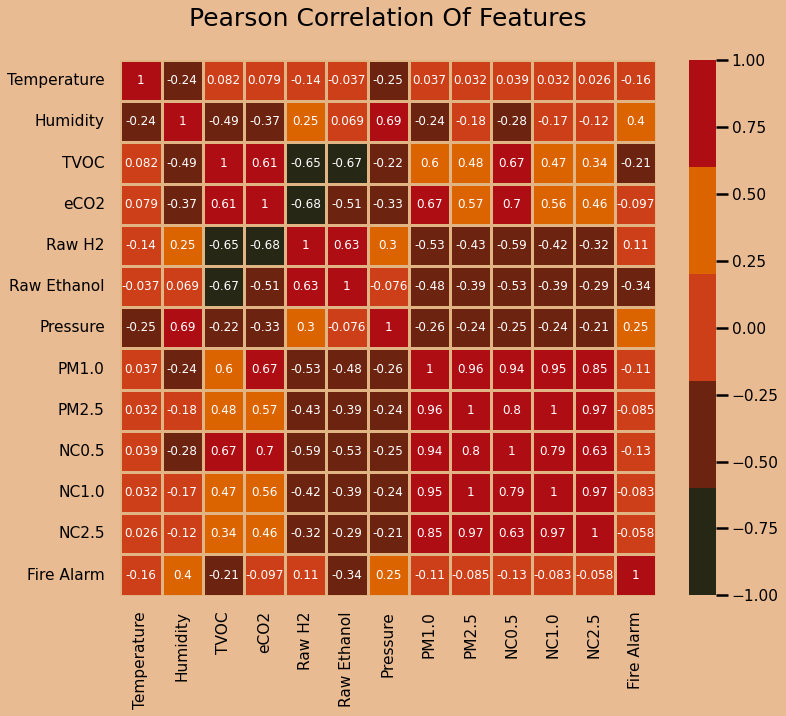

In [30]:
catcol = [col for col in data.columns if data[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(12, 12))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Insights:**

* We can see there is not any high correlation between target feature and other features. Small positive correlation between target feature and **Humidity**, **Pressure**. Small negative correlation between target feature and **TVOC**, **Raw Ethanol**.

* High positive correlation between **eCO2** and **TVOC**, **PM1.0**, **NC0.5**. **Pressure** and **Humidity**. **TVOC** and **NC0.5**. **Raw H2** and **Raw Ethanol**. **PM1.0** and **eCO2**, **PM2.5**, **NC0.5**, **NC1.0**, **NC2.5**. **PM2.5** and **NC0.5**, **NC1.0**, **NC2.5**. **NC0.5** and **NC1.0**, **NC2.5**. 



<a id="17"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Creation & Performance Evaluation</p>

After performing standardization, we have splitted the dataset with a ratio of 0.2 that means 80% data for training and 20% data for validation process.

In [31]:
x = data.drop(["Fire Alarm"],axis =1)
y = data["Fire Alarm"]

sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (50104, 12), (50104,)
Shape of testing data : (12526, 12), (12526,)


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#5f0d11;font-size:200%;font-weight: 500;color:#ddab46;overflow:hidden;">ㅤLogistic Regressionㅤ</span>

In [32]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[2731  863]
 [ 447 8485]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3594
           1       0.91      0.95      0.93      8932

    accuracy                           0.90     12526
   macro avg       0.88      0.85      0.87     12526
weighted avg       0.89      0.90      0.89     12526


The Accuracy of Logistic Regression is 89.54 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#5f0d11;font-size:200%;font-weight: 500;color:#ddab46;overflow:hidden;">ㅤGaussian Naive Bayesㅤ</span>

In [33]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 870 2724]
 [ 236 8696]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.79      0.24      0.37      3594
           1       0.76      0.97      0.85      8932

    accuracy                           0.76     12526
   macro avg       0.77      0.61      0.61     12526
weighted avg       0.77      0.76      0.72     12526


The Accuracy of Gaussian Naive Bayes is 76.37 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#5f0d11;font-size:200%;font-weight: 500;color:#ddab46;overflow:hidden;">ㅤBernoulli Naive Bayesㅤ</span>

In [34]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[2355 1239]
 [ 241 8691]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.91      0.66      0.76      3594
           1       0.88      0.97      0.92      8932

    accuracy                           0.88     12526
   macro avg       0.89      0.81      0.84     12526
weighted avg       0.88      0.88      0.88     12526


The Accuracy of Bernoulli Naive Bayes is 88.18 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#5f0d11;font-size:200%;font-weight: 500;color:#ddab46;overflow:hidden;">ㅤSupport Vector Machineㅤ</span>

In [35]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[2949  645]
 [  52 8880]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      3594
           1       0.93      0.99      0.96      8932

    accuracy                           0.94     12526
   macro avg       0.96      0.91      0.93     12526
weighted avg       0.95      0.94      0.94     12526


The Accuracy of Support Vector Machine is 94.44 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#5f0d11;font-size:200%;font-weight: 500;color:#ddab46;overflow:hidden;">ㅤRandom Forestㅤ</span>

In [36]:
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[3594    0]
 [   0 8932]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


The Accuracy of Random Forest Classifier is 100.0 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#5f0d11;font-size:200%;font-weight: 500;color:#ddab46;overflow:hidden;">ㅤK Nearest Neighborsㅤ</span>

In [37]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[3592    2]
 [   7 8925]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


The Accuracy of K Nearest Neighbors Classifier is 99.93 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#5f0d11;font-size:200%;font-weight: 500;color:#ddab46;overflow:hidden;">ㅤExtreme Gradient Boostingㅤ</span>

In [38]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[3593    1]
 [   0 8932]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


The Accuracy of Extreme Gradient Boosting Classifier is 99.99 %


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#5f0d11;font-size:200%;font-weight: 500;color:#ddab46;overflow:hidden;">ㅤNeural Network Architectureㅤ</span>

In [42]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

regularization_parameter = 0.003

neural_model = Sequential([tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=16,activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=1, activation="sigmoid")
                    ])

print(neural_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                416       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
__________________________________________________

In [43]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()


neural_model.compile(optimizer = Adam(learning_rate = 0.001), 
                     loss = "binary_crossentropy", 
                     metrics = ["accuracy"])

history = neural_model.fit(x_train, y_train,
                           epochs = 150,
                           verbose = 1,
                           batch_size = 64,
                           validation_data = (x_test, y_test),
                           callbacks = [callbacks])

Epoch 1/150
783/783 [==============================] - 4s 4ms/step - loss: 0.8293 - accuracy: 0.9159 - val_loss: 0.3083 - val_accuracy: 0.9537
Epoch 2/150
783/783 [==============================] - 3s 4ms/step - loss: 0.2810 - accuracy: 0.9561 - val_loss: 0.2489 - val_accuracy: 0.9632
Epoch 3/150
783/783 [==============================] - 3s 4ms/step - loss: 0.2444 - accuracy: 0.9603 - val_loss: 0.2260 - val_accuracy: 0.9649
Epoch 4/150
783/783 [==============================] - 3s 4ms/step - loss: 0.2211 - accuracy: 0.9628 - val_loss: 0.2043 - val_accuracy: 0.9670
Epoch 5/150
783/783 [==============================] - 3s 4ms/step - loss: 0.2078 - accuracy: 0.9647 - val_loss: 0.1981 - val_accuracy: 0.9670
Epoch 6/150
783/783 [==============================] - 3s 4ms/step - loss: 0.1992 - accuracy: 0.9652 - val_loss: 0.1945 - val_accuracy: 0.9685
Epoch 7/150
783/783 [==============================] - 3s 4ms/step - loss: 0.1949 - accuracy: 0.9656 - val_loss: 0.1878 - val_accuracy: 0.9679

Let's have a look on the performance of neural network architecture :


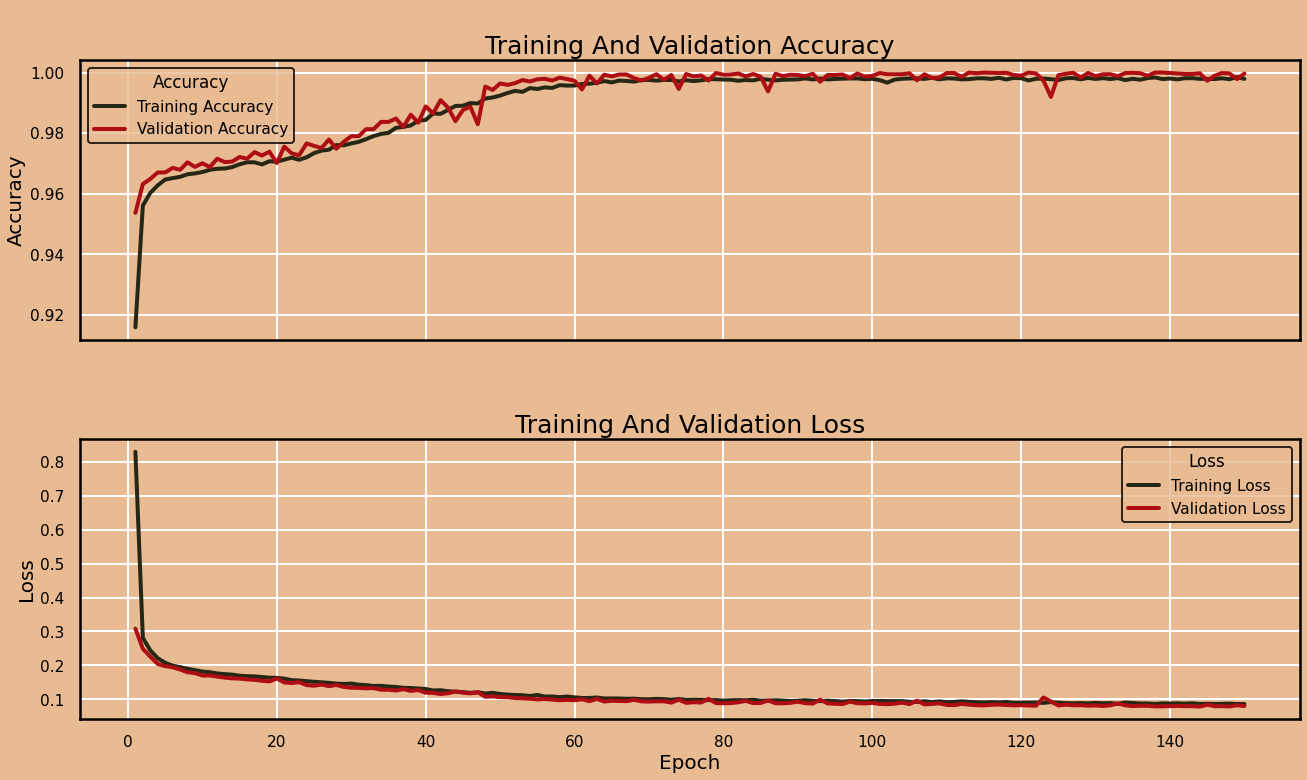

In [45]:
# acc = history.history["accuracy"]
# val_acc = history.history["val_accuracy"]
# loss = history.history["loss"]
# val_loss = history.history["val_loss"]

performance = pd.DataFrame(history.history)
performance["Epoch"] = range(1,len(history.history["accuracy"])+1)    # number of epochs
performance.rename(columns={"loss": "Training Loss","accuracy": "Training Accuracy","val_loss":"Validation Loss","val_accuracy":"Validation Accuracy"}, inplace = True)


print(f"Let's have a look on the performance of neural network architecture :")
_, axs = plt.subplots(2,1,figsize=(20,12), sharex=True)
plt.tight_layout(pad=5.0)

sns.lineplot(data=performance,x="Epoch",y="Training Accuracy",ax=axs[0],color=palette[0],alpha=1,linewidth=4)
sns.lineplot(data=performance,x="Epoch",y="Validation Accuracy",ax=axs[0],color=palette[2],alpha=1,linewidth=4)
axs[0].set_title("\nTraining And Validation Accuracy",fontsize=25)
axs[0].set_ylabel("Accuracy",fontsize=20)
axs[0].set_xlabel("Epoch",fontsize=20)
axs[0].legend(["Training Accuracy","Validation Accuracy"],title="Accuracy")

sns.lineplot(data=performance,x="Epoch",y="Training Loss",ax=axs[1],color=palette[0],alpha=1,linewidth=4)
sns.lineplot(data=performance,x="Epoch",y="Validation Loss",ax=axs[1],color=palette[2],alpha=1,linewidth=4)
axs[1].set_title("\nTraining And Validation Loss",fontsize=25)
axs[1].set_ylabel("Loss",fontsize=20)
axs[1].set_xlabel("Epoch",fontsize=20)
axs[1].legend(["Training Loss","Validation Loss"],title="Loss")

plt.show()

<a id="18"></a>
# <p style="padding:10px;background-color:#5f0d11;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>
